# Movie Genre Classification 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
movie_train = pd.read_csv(r"C:\Personal\DS-Py\Project\Movie Genre Classification\train_data.txt",sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
movie_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [3]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
movie_train.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

# EDA

<AxesSubplot:title={'center':'Genre Count in the Dataset'}, xlabel='Genre', ylabel='Count'>

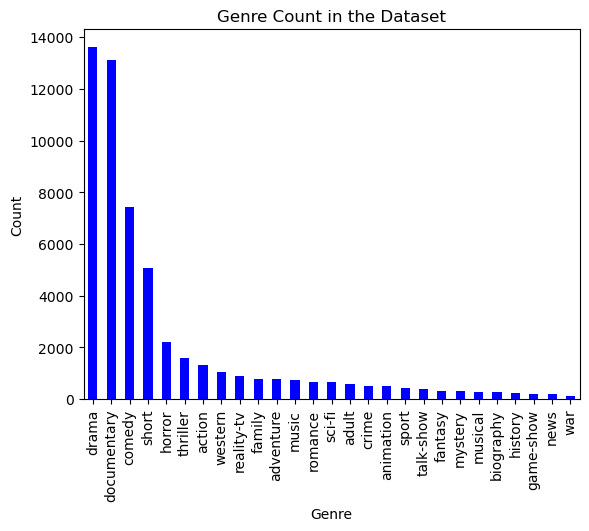

In [5]:
genre_cnt = movie_train["Genre"].value_counts()
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Count in the Dataset")
genre_cnt.plot(kind='bar',color='blue')

In [6]:
 # The 'drama', 'documentary' and 'comedy' were the most popular genres.

In [7]:
# Checking if there is some relation between the title length of the movie and its corresponding genre

Text(0.5, 1.0, 'Title length distribution')

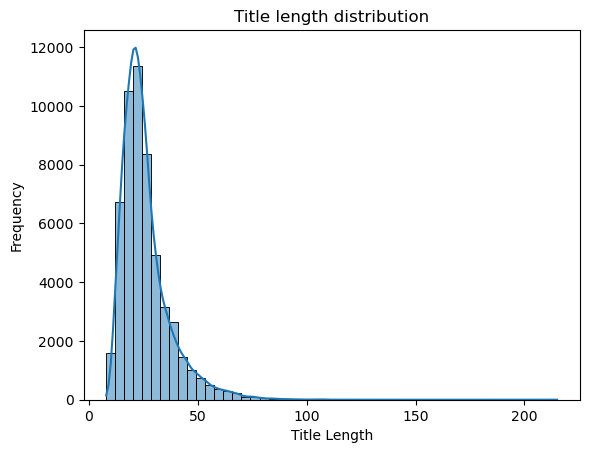

In [8]:
#genre and title length correlation
movie_train['title_length'] = movie_train['Title'].apply(len)
sns.histplot(data=movie_train,x='title_length',bins=50,kde=True)
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.title("Title length distribution")
#20 

# **TEXT PREPROCESSING**

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import nltk
import subprocess
from nltk.corpus import wordnet

In [11]:
# Using a function which does all the stuff from converting plot text to lowercase, removing every non-alphabetic characters except space, removing stopwords and lastly lemmatization to reduce words in their base forms.

In [12]:
lemmatizer = WordNetLemmatizer()

stopwords_set = set(stopwords.words('english'))
def text_prep(text):
    c_text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    c_text = c_text.lower()
    tokens = c_text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
    return " ".join(tokens)
movie_train['Description']=movie_train['Description'].apply(text_prep)
movie_train

,Title,Genre,Description,title_length
1,Oscar et la dame rose (2009),drama,listening conversation doctor parent yearold o...,28
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,12
3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...,32
4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...,21
5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...,22
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,shortlived nbc live sitcom centered bonino wor...,15
54211,Dead Girls Don't Cry (????),horror,next generation exploitation sister kapa bay s...,27
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt standup comedy growing facing ...,41
54213,Make Your Own Bed (1944),comedy,walter vivian live country difficult time keep...,24


# Term Frequency - Inverse Document Frequency (TF-IDF)

I used this statistical method to measure how important a word was within its plot relative to within all the movie plots.It assigns higher values to words that are unique to specific movies while downweighting common words.

In [13]:
v = TfidfVectorizer()
transformed_output=v.fit_transform(movie_train['Description'])

In [14]:
#Firstly, we split the training data into further training and test data 8:2

In [15]:
from sklearn.model_selection import train_test_split
y=movie_train["Genre"]
X=transformed_output
X_train, X_test, y_train,y_test = train_test_split(
X,y,test_size=0.2,random_state=1)

In [16]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf= rf.predict(X_test)
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print(f"Accuracy of train : {accuracy_train_rf}")
print(f"Accuracy of test : {accuracy_test_rf}")

Accuracy of train : 0.9995388623734753
Accuracy of test : 0.4819699345199668


In [18]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

y_train=lab_enc.fit_transform(y_train)
y_test=lab_enc.transform(y_test)

In [19]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = nb.predict(X_train)
y_pred_test= nb.predict(X_test)
accuracy_train_nb = accuracy_score(y_train,y_pred_train)
accuracy_test_nb = accuracy_score(y_test,y_pred_test)
print(f"Accuracy of train : {accuracy_train_nb}")
print(f"Accuracy of test : {accuracy_test_nb}")
# print(classification_report(y_test,y_pred_test,zero_division=1))

Accuracy of train : 0.46427336238500383
Accuracy of test : 0.4422207876049064


In [21]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
# Transforming numerical labels back to genres
y_pred_train_genre = lab_enc.inverse_transform(y_pred_train_lr)
y_pred_train_genre = lab_enc.inverse_transform(y_pred_test_lr)

accuracy_train_lr=accuracy_score(y_train,y_pred_train_lr)
accuracy_test_lr=accuracy_score(y_test,y_pred_test_lr)
print(f"Accuracy of train : {accuracy_train_lr}")
print(f"Accuracy of test : {accuracy_test_lr}")

Accuracy of train : 0.7164925872126536
Accuracy of test : 0.5765931937655631


Logistic Regression Classifier gave us the most highest accuracy among others. So we'll use this classifier to predict other movies.

In [23]:
Evaluation = pd.DataFrame({'Naive Bayes Model': [accuracy_train_nb],
                           'Logistic Regression Model':[accuracy_train_lr],
                          'Random Forest Model' :[accuracy_train_rf]}, index=['Accuracy'])
Evaluation

,Naive Bayes Model,Logistic Regression Model,Random Forest Model
Accuracy,0.464273,0.716493,0.999539


# Evaluation of the provided test data

In [24]:
movie_test = pd.read_csv(r"C:\Personal\DS-Py\Project\Movie Genre Classification\test_data.txt",sep=" ::: ",header=None,engine='python',names=['Name','Description'])

In [25]:
movie_test['Description']=movie_test['Description'].apply(text_prep)
movie_test

,Name,Description
1,Edgar's Lunch (1998),lr brane love life car apartment job especiall...
2,La guerra de papá (1977),spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),one year life albin family shepherd north tran...
4,Meu Amigo Hindu (2015),father died hasnt spoken brother year serious ...
5,Er nu zhai (1955),known internationally martial art superstar br...
...,...,...
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale light dark anthol...
54197,Der letzte Mohikaner (1965),alice cora munro attempt find father british o...
54198,Oliver Twink (2007),movie year making oliver twist artful dodger f...
54199,Slipstream (1973),popular mysterious rock dj mike mallard askew ...


In [26]:
X_tfidf_test= v.transform(movie_test['Description'])
X_tfidf_test

<54200x136051 sparse matrix of type '<class 'numpy.float64'>'
	with 2518265 stored elements in Compressed Sparse Row format>

In [27]:
X_tfidf_test.shape

(54200, 136051)

In [28]:
y_predicted = lr.predict(X_tfidf_test)
y_predicted_genre=lab_enc.inverse_transform(y_predicted)
movie_test['Predicted Genre']= y_predicted_genre
test_data_solution = pd.read_csv(r"C:\Personal\DS-Py\Project\Movie Genre Classification\test_data_solution.txt",sep = ' ::: ',header=None,engine='python',names=['Title','Genre','Description'])
movie_test['Actual Genre']= test_data_solution['Genre']


random_rows = movie_test.sample(n=7)
random_rows

,Name,Description,Predicted Genre,Actual Genre
4884,Show! (2013),surprisingly intimate portrait dream running o...,documentary,documentary
34821,Hatch (2014/II),group old acquaintance coincidentally come tog...,horror,horror
31378,Hure (1997),see person cruising redlight district looking ...,drama,short
41087,Boss (2006),abandoned birth kasturba annarthalay father ga...,drama,romance
47754,Poker (2010/I),four boy start neglecting school order meet hi...,comedy,comedy
48973,Break-Up Date (2008),worst breakup get date next online dating spee...,comedy,documentary
27075,"""Cosmos"" (1980)",astronomer dr carl sagan host narrator hour se...,documentary,documentary


In [29]:
accuracy_predicted = accuracy_score(test_data_solution['Genre'],y_predicted_genre)
print(f"Accuracy of the test data : {accuracy_predicted}")

Accuracy of the test data : 0.5801476014760147


Out of all the movie genre predictions made on the test data, the model correctly identified the genre for approximately 58% of the instances.

The accuracy value is a percentage, and a higher accuracy generally suggests better performance. However, the interpretation of what constitutes a "good" accuracy depends on the context and the specific requirements of your application.

In summary, an accuracy of 58% suggests that your model has room for improvement, and further analysis of additional metrics and potentially model refinement might be necessary to enhance its predictive performance.